# Correlations between the top and bottom of the slice

To assess if there are cells lying on top of each other in the z plane, we can slice our data into a top and bottom plane, e. g. by taking the top 25% and the bottom 25%. We can then compute the Pearson correlation between the two planes for each cell. If the correlation is high, the top and bottom layers likely show the same cell. If it is low, there might be two or more cells overlapping in the z direction.

In [16]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import spatialdata as sd
import squidpy as sq

import segtraq as st

sdata = sd.read_zarr("/g/huber/projects/CODEX/segtraq/data/seg_comparison/spatialData_2_C1_proseg.zarr")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/meyerben/meyerben/notebooks/spatial_transcriptomics/SegTraQ/.venv/lib/python3.13/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
version mismatch: detected: RasterFormatV02, requested: FormatV04
/home/meyerben/meyerben/notebooks/spatial_transcriptomics/SegTraQ/.venv/lib/python3.13/site-packages/zarr/creation.py:610: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


In [17]:
correlation_df = st.cs.compute_z_plane_correlation(sdata)
correlation_df.head()

<string>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<string>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,correlation
cell_id,
UNASSIGNED,0.986754
affmepaj-1,0.668409
affmgdje-1,0.313853
affmgmio-1,0.422878
affmkcka-1,0.570178


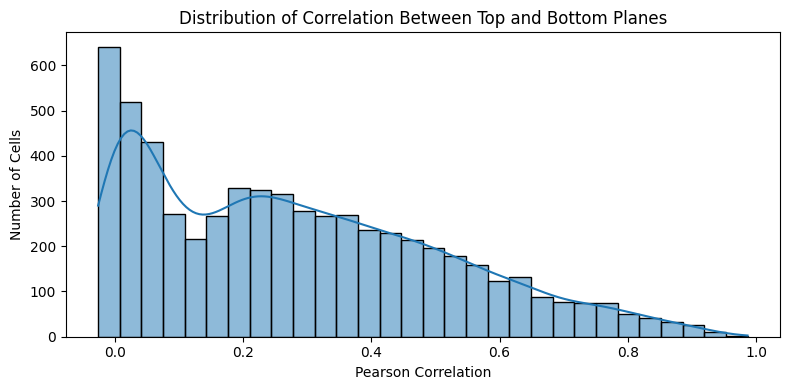

In [18]:
# Plot the distribution of correlation values
plt.figure(figsize=(8, 4))
sns.histplot(correlation_df["correlation"], bins=30, kde=True)

plt.title("Distribution of Correlation Between Top and Bottom Planes")
plt.xlabel("Pearson Correlation")
plt.ylabel("Number of Cells")
plt.tight_layout()
plt.show()

In [ ]:
# TODO: at this point, we should merge them to the adata object
# unfortunately, the adata object does not contain matching cell IDs, so we cannot do this yet

In [19]:
adata = sdata.tables["table"]

# we need to add the spatial coordinates to the adata object for plotting
adata.obsm["spatial"] = adata.obs[["centroid-0", "centroid-1"]].to_numpy()

# adding the correlation values to the adata object
adata.obs["z_plane_correlation"] = adata.obs.index.map(correlation_df["correlation"])

In [25]:
adata.obs

,centroid_x,centroid_y,cell_size,axis_minor_length,axis_major_length,centroid-0,centroid-1,eccentricity,solidity,perimeter,sample_id,TMA,region,mask_id,z_plane_correlation
cell_id,,,,,,,,,,,,,,,
1,377.79850,513.17664,395.71875,6.590376,8.878127,512.720930,376.953488,0.670050,0.860000,24.899495,2_C1,2,cell_labels,1,NaN
2,349.86170,643.56384,92.53125,2.653300,5.366563,643.600000,349.000000,0.869227,0.500000,0.000000,2_C1,2,cell_labels,2,NaN
3,401.73760,398.32178,397.68750,5.502993,9.527791,396.305556,400.916667,0.816339,0.800000,21.071068,2_C1,2,cell_labels,3,NaN
4,257.44656,319.80533,773.71875,9.718573,11.625859,319.301205,257.168675,0.548814,0.813725,34.384776,2_C1,2,cell_labels,4,NaN
5,195.35858,549.35860,194.90625,3.843169,5.055352,548.785714,194.928571,0.649668,0.875000,11.414214,2_C1,2,cell_labels,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,539.39000,343.35000,196.87500,6.445665,16.611864,343.063492,539.158730,0.921653,0.684783,40.798990,2_C1,2,cell_labels,5843,NaN
5844,256.99690,636.03420,316.96875,7.896618,12.941854,636.506667,256.333333,0.792277,0.842697,35.142136,2_C1,2,cell_labels,5844,NaN
5845,310.64035,493.85090,112.21875,6.976622,7.382183,493.272727,310.151515,0.326891,0.733333,24.727922,2_C1,2,cell_labels,5845,NaN


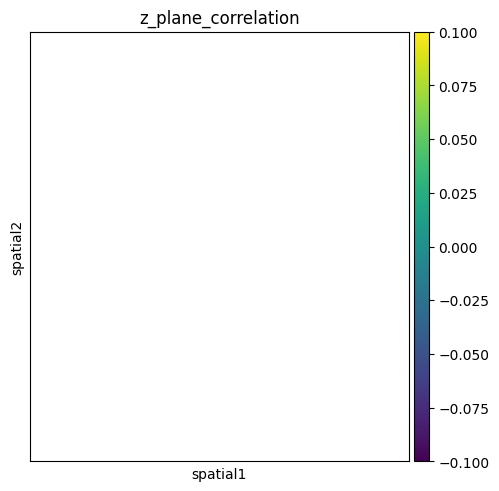

In [20]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["z_plane_correlation"],
)